# QDAC-II multiple generators per channel


In [1]:
from time import sleep
import numpy
from IPython.display import Image, display
from qcodes_contrib_drivers.drivers.QDevil import QDAC2
qdac_addr = '192.168.8.153'
qdac = QDAC2.QDac2('QDAC-II', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/211109-10676-qcodes.log
Connected to: QDevil QDAC-II (serial:48762, firmware:5-0.9.26) in 0.28s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.08s


In [2]:
qdac.reset()
scope.write('*rst')
sleep(3)

In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.1')
scope.write('chan3:offs 0.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.05')
scope.write('tim:scal 2e-4')
scope.write('tim:offs 0')

In [5]:
channel = qdac.ch03
square = channel.square_wave()
sine = qdac.ch03.sine_wave()
triangle = qdac.ch03.triangle_wave()
scope.write('run')
qdac.start_all()

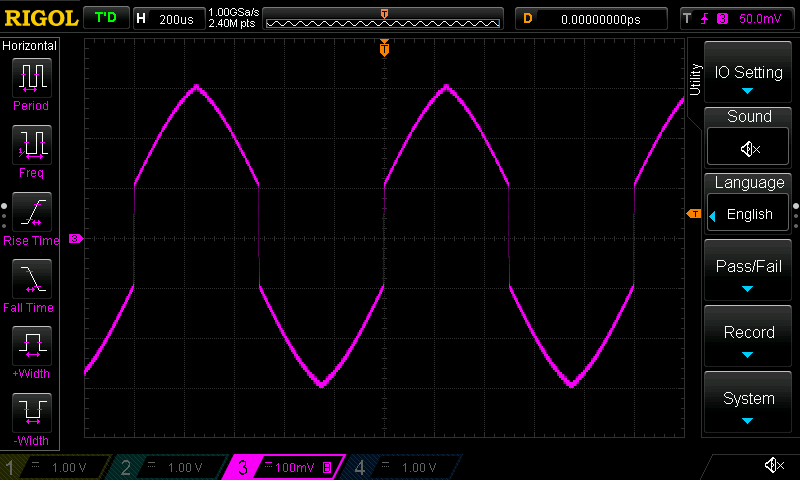

In [6]:
capture()

In [7]:
sine.abort()
sleep(3)
scope.write('run')

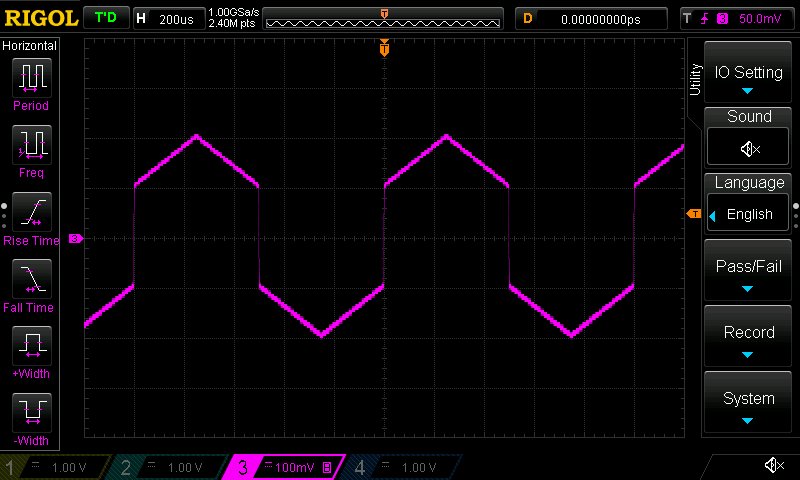

In [8]:
capture()

In [9]:
channel.abort()
scope.write('run')